In [1]:
import pandas as pd

In [5]:
pd.set_option('display.max_colwidth', -1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


In [3]:
data = pd.read_json(r'C:\Users\Jrive\Desktop\practice_projects\license_recognition\license_reader\Indian_Number_plates.json', lines=True)

In [7]:
data.sample(10)

,content,annotation,extras
230,http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/9f7c7dce-f9c9-4c95-a053-8f16e6e99466___new_new-maruti-alto-k10-2_625x300_41414071192.jpg.jpeg,"[{'label': ['number_plate'], 'notes': '', 'points': [{'x': 0.330188679245283, 'y': 0.5983935742971881}, {'x': 0.764150943396226, 'y': 0.8835341365461841}], 'imageWidth': 424, 'imageHeight': 249}]",NaN
223,http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/0073797c-a755-4972-b76b-8ef2b31d44ab___new_IMG_20160315_071740.jpg.jpeg,"[{'label': ['number_plate'], 'notes': '', 'points': [{'x': 0.272, 'y': 0.585074626865671}, {'x': 0.6960000000000001, 'y': 0.8298507462686561}], 'imageWidth': 500, 'imageHeight': 335}]",NaN
53,http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/d4bec046-caac-4e59-bd05-44de2232d83b___2017-Skoda-Octavia-Front.jpg.jpeg,"[{'label': ['number_plate'], 'notes': '', 'points': [{'x': 0.52, 'y': 0.56115107913669}, {'x': 0.8875000000000001, 'y': 0.7014388489208631}], 'imageWidth': 400, 'imageHeight': 278}]",NaN
148,http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/ed6ee171-691a-4563-a79d-4f47d8ce9f85___Maruti-Suzuki-SCross-Exterior-80675.jpg.jpeg,"[{'label': ['number_plate'], 'notes': '', 'points': [{'x': 0.191666666666666, 'y': 0.765578635014836}, {'x': 0.6916666666666661, 'y': 0.9881305637982191}], 'imageWidth': 600, 'imageHeight': 337}]",NaN
37,http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/b266759c-f9e9-47c1-9042-4c7aef7d441d___1711769d1514801394t-toyota-innova-crysta-2-4-gx-ownership-review-edit-10-000-km-service-done-vs.jpg.jpeg,"[{'label': ['number_plate'], 'notes': '', 'points': [{'x': 0.401315789473684, 'y': 0.43548387096774105}, {'x': 0.631578947368421, 'y': 0.6854838709677411}], 'imageWidth': 304, 'imageHeight': 248}]",NaN
204,http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/bb210ab4-795c-4b2b-9b6e-4597cbc67375___White-2BPlate.jpeg,"[{'label': ['number_plate'], 'notes': '', 'points': [{'x': 0.361990950226244, 'y': 0.633633633633633}, {'x': 0.644796380090497, 'y': 0.7897897897897891}], 'imageWidth': 442, 'imageHeight': 333}]",NaN
15,http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/8625b831-13a1-4b7d-9466-826cd6d36c67___1304650d1414861991-number-plates-merchandise-canvas-ink-gurgaon-edit-closed-10471269_1537317779842156_5063668061078329632_n.jpg.jpeg,"[{'label': ['number_plate'], 'notes': '', 'points': [{'x': 0.35400516795865605, 'y': 0.5358255451713391}, {'x': 0.667958656330749, 'y': 0.671339563862928}], 'imageWidth': 774, 'imageHeight': 642}]",NaN
225,http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/7f369852-27b9-4141-8c48-9e88b20743a6___new_Mahindra-Scorpio-Taillamps-Night.JPG.jpeg,"[{'label': ['number_plate'], 'notes': '', 'points': [{'x': 0.28600000000000003, 'y': 0.524173027989821}, {'x': 0.804, 'y': 0.694656488549618}], 'imageWidth': 500, 'imageHeight': 393}]",NaN
107,http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/d44f95e3-47df-415f-9359-cd2f1f27ad86___eecitmw.gif,"[{'label': ['number_plate'], 'notes': '', 'points': [{'x': 0.111428571428571, 'y': 0.17050691244239602}, {'x': 0.902857142857142, 'y': 0.8755760368663591}], 'imageWidth': 350, 'imageHeight': 217}]",NaN
143,http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/fb939bb1-5257-4879-bafb-539472ffb73d___Maruti-Suzuki-Brezza-Number-Plates-Design.jpg.jpeg,"[{'label': ['number_plate'], 'notes': '', 'points': [{'x': 0.36776859504132203, 'y': 0.44956140350877105}, {'x': 0.7231404958677681, 'y': 0.600877192982456}], 'imageWidth': 484, 'imageHeight': 456}]",NaN


# The Plan

First, I would like to loop through this dataset of images and apply the method from the basic notebook to them. I will keep a count of how many OpenCV are correct. 

After that, I would like to research another method to use, possibly a cnn with keras.

In [ ]:
#first, I need to convert those links to images into actual images

In [65]:
import urllib
import os
import cv2
import matplotlib.pyplot as plt
from PIL import Image

In [9]:
os.mkdir("Cleaned plates")

In [14]:
dataset = dict()
dataset['image_name'] = list()

counter = 0
for index, row in data.iterrows():
    img = urllib.request.urlopen(row['content'])
    img = Image.open(img)
    img = img.convert('RGB')
    img.save(f"Cleaned plates/licensed_car{counter}.jpeg", "JPEG")
    
    dataset['image_name'].append(f"licensed_car{counter}")
    
    counter += 1
    
print(f"Downloaded {counter} car images")

Downloaded 237 car images


In [61]:
df = pd.DataFrame(dataset)
df.head()

,image_name
0,licensed_car0
1,licensed_car1
2,licensed_car2
3,licensed_car3
4,licensed_car4


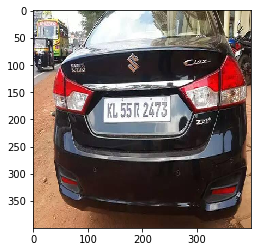

In [67]:
#lets take a look at some images

path = 'license_reader\Cleaned plates\''
image = cv2.imread("Cleaned plates/" + df['image_name'].iloc[10] + '.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, dsize=(400, 400))

plt.imshow(image)
plt.show()

In [ ]:
df['image'] = list()

for name in df['image_name']:
    image = cv2.imread("Cleaned plates/" + name + '.jpeg')
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, dsize=(400, 400))
    
    df['image'].append(image)
    
df['image']

### Now to apply the old method to the new data

In [73]:
import cv2
import imutils
import numpy as np
import pytesseract

pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

def open_cv_method():

    counter = 0 
    found_plate = 0
    lost_plate = 0
    guessed_number = 0 

    for pic in df['image_name']:
        image = cv2.imread("Cleaned plates/" + pic + '.jpeg')
        image = cv2.resize(image, dsize=(400, 400))
        grey = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        counter += 1

        grey = cv2.bilateralFilter(grey, 13, 15, 15)
        edges = cv2.Canny(grey, 30, 200)

        contours = cv2.findContours(edges.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        #this is parsing the contours
        contours = imutils.grab_contours(contours)
        #sorts the list of contours by the largest area of contours
        contours = sorted(contours, key = cv2.contourArea, reverse=True)[:10]
        screenCnt = None

        for c in contours:
            #finds the perimeter of the contour if it is a closed figure
            p = cv2.arcLength(c, True)
            #this approximates a polygon (our rectangle) with less vertices, keeping it within
            #a specified precision
            # that is our second parameter, again the last is to ensure it is a closed figure
            approx = cv2.approxPolyDP(c, 0.018 * p, True)
            #if our approx of the contour has four points, we stop and assume
            # that we have found our screen
            if len(approx) == 4:
                screenCnt = approx
                break

        #I need to add in code to handle errors from the above loop, will after getting skeleton
        #will add comments for understanding soon 

        if screenCnt is None:
            detected = 0
            #print("No contour detected")
            lost_plate += 1
        else:
            detected = 1
            found_plate += 1
        if detected == 1:
            cv2.drawContours(image, [screenCnt], -1, (0, 0, 255), 3)

        if detected == 1:

            #creating an empty array in the shape of our image, in the uint8 datatype specifically
            mask = np.zeros(grey.shape, np.uint8)
            #drawing our contour onto the mask, using the vector identified in the for loop above
            #in 255 color, the -1 meaning contour interiors are also drawn
            new_image = cv2.drawContours(mask, [screenCnt], 0, 255, -1)
            #combines the picture with our mask
            new_image = cv2.bitwise_and(image, image, mask=mask)

            #get all points that are colored in the mask
            (x, y) = np.where(mask == 255)
            #get the minimum and maximum of these values so we can crop
            (topx, topy) = (np.min(x), np.min(y))
            (bottomx, bottomy) = (np.max(x), np.max(y))
            #use those measurements to get the license plate from the rescaled, greyscale image
            cropped = grey[topx:bottomx+1, topy:bottomy+1]

            text = pytesseract.image_to_string(cropped, config = '--psm 11')
            guessed_number += 1
        else:
            pass

    print(f'Count: {counter}')
    print(f'Couldnt find plate: {lost_plate}')
    print(f'Found plate: {found_plate}')
    print(f'Guessed a plate number: {guessed_number}')

In [75]:
for i in range(5):
    open_cv_method()

Count: 237
Couldnt find plate: 94
Found plate: 143
Guessed a plate number: 143
Count: 237
Couldnt find plate: 94
Found plate: 143
Guessed a plate number: 143
Count: 237
Couldnt find plate: 94
Found plate: 143
Guessed a plate number: 143
Count: 237
Couldnt find plate: 94
Found plate: 143
Guessed a plate number: 143
Count: 237
Couldnt find plate: 94
Found plate: 143
Guessed a plate number: 143
